In [1]:
import pandas as pd
import numpy as np

In [4]:
DCapi = pd.read_csv('/content/drive/MyDrive/exports/washington_dc_stations_elevation.csv')
DCapi.head()

,station_id,station_latitude,station_longitude,station_elevation
0,31000,38.858971,-77.053230,-16.0
1,31001,38.857250,-77.053320,-16.0
2,31002,38.856425,-77.049232,-16.0
3,31003,38.860132,-77.049541,-17.0
4,31004,38.857866,-77.059490,-11.0


In [22]:
DCusgs = pd.read_csv('/content/drive/MyDrive/exports/DC_elevation.csv')
DCnull= DCusgs[DCusgs['DN'].isnull()]
DCnull.shape

(25, 4)

In [11]:
DC_join = DCusgs.merge(DCapi,left_on='station_id',right_on='station_id',how='left')
DC_join['difference']= DC_join['DN'] - DC_join['station_elevation'] 
DC_join

,station_id,lat,lng,DN,station_latitude,station_longitude,station_elevation,difference
0,31000,38.858970,-77.053239,14.0,38.858971,-77.053230,-16.0,30.0
1,31001,38.857250,-77.053402,15.0,38.857250,-77.053320,-16.0,31.0
2,31002,38.856408,-77.049262,10.0,38.856425,-77.049232,-16.0,26.0
3,31003,38.860856,-77.049425,6.0,38.860132,-77.049541,-17.0,23.0
4,31004,38.857866,-77.059490,16.0,38.857866,-77.059490,-11.0,27.0
...,...,...,...,...,...,...,...,...
489,32422,38.968849,-76.954174,33.0,38.968887,-76.954183,5.0,28.0
490,31711,38.908462,-76.933111,10.0,38.908473,-76.933099,-18.0,28.0
491,31715,38.883011,-76.949709,40.0,38.883011,-76.949709,7.0,33.0
492,31815,38.846015,-76.976875,48.0,38.846230,-76.977030,18.0,30.0


In [27]:
DC_join.describe()

,station_id,lat,lng,DN,station_latitude,station_longitude,station_elevation,difference
count,494.000000,494.000000,494.000000,469.000000,494.000000,494.000000,494.000000,469.000000
mean,31459.076923,38.901901,-77.033237,36.392324,38.901906,-77.033243,7.423077,29.488273
std,357.829651,0.040051,0.041608,29.696679,0.040051,0.041610,29.131672,2.983282
min,31000.000000,38.807026,-77.120692,1.000000,38.807040,-77.120700,-36.000000,7.000000
25%,31132.250000,38.880868,-77.061557,13.000000,38.880868,-77.061547,-15.000000,28.000000
50%,31323.500000,38.898389,-77.032467,26.000000,38.898410,-77.032464,-4.000000,30.000000
75%,31664.750000,38.920974,-77.003955,57.000000,38.920976,-77.003962,26.000000,31.000000
max,32422.000000,38.999388,-76.913135,122.000000,38.999388,-76.913188,91.000000,41.000000


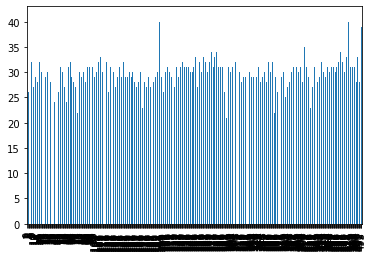

In [30]:
DC_join['difference'].plot.bar()

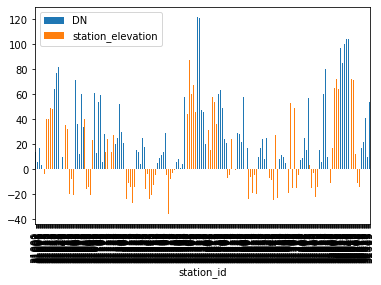

In [33]:
DC_join.plot.bar(x='station_id',y=['DN','station_elevation'])

In [23]:
DC_count= DC_join[DC_join['difference'] == 0]
DC_count.shape

(0, 8)

In [25]:
DC_count2= DC_join[DC_join['difference'] < 10]
DC_count2.shape

(1, 8)

In [ ]:
# when using usgs data, there were 25 missing data. but there is no negative value data.
# those two data are completely different.